In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x=df.iloc[:,2:4]
x=np.array((x))
x=iris.data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
def makegrid(x1,x2,h=0.08):
    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1
    a=np.arange(x1_min,x1_max,h)
    b=np.arange(x2_min,x2_max,h)
    xx,yy=np.meshgrid(a,b)
    return xx,yy

In [9]:
a,b=makegrid(x[:,0],x[:,1])
x1=a.ravel()
x2=b.ravel()

In [10]:
plot_data=np.c_[x1,x2]
predictions=clf.predict(plot_data)
plt.scatter(x1,x2,c=predictions)
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

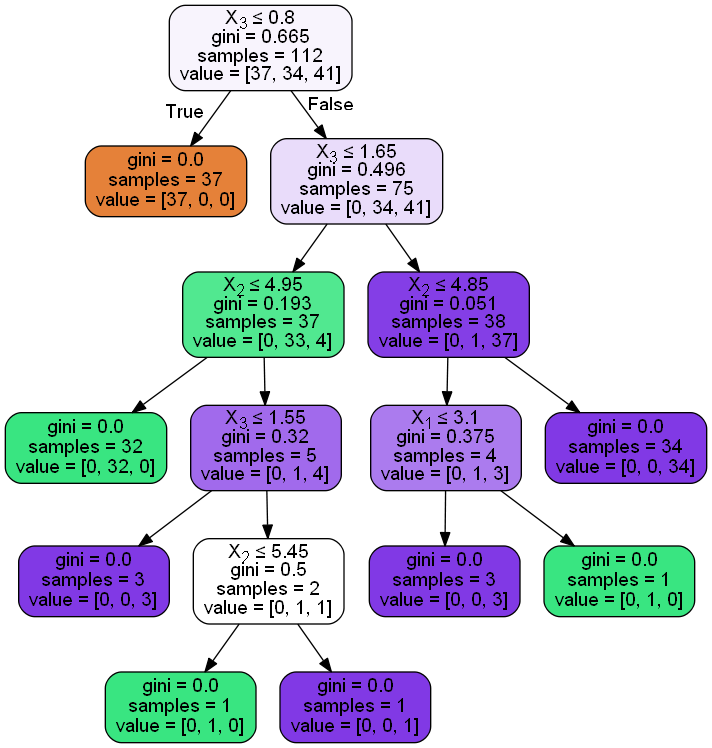

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())